# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [15]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = BeautifulSoup(html, 'html.parser')
mars_soup


<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [25]:
# Extract all rows of data
mars_rows_data = mars_soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in mars_rows_data:
    data=row.find_all('td')
    tags_list=[]
    for tags in data:
        tags_list.append(tags.text)
    mars_data.append(tags_list)
print(mars_data)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [30]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [31]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [32]:
# Change data types for data analysis
mars_df["id"] = pd.to_numeric(mars_df["id"])
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df["sol"] = pd.to_numeric(mars_df["sol"])
mars_df["ls"] = pd.to_numeric(mars_df["ls"])
mars_df["month"] = pd.to_numeric(mars_df["month"])
mars_df["min_temp"] = pd.to_numeric(mars_df["min_temp"])
mars_df["pressure"] = pd.to_numeric(mars_df["pressure"])

In [33]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [57]:
# 1. How many months are there on Mars?
mars_df['month'].max()

np.int64(12)

In [58]:
# 2. How many sols (Martian days) worth of data are there?
sols_days=mars_df['sol'].nunique()
sols_days

1867

In [59]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df['min_temp'].groupby(mars_df['month']).mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

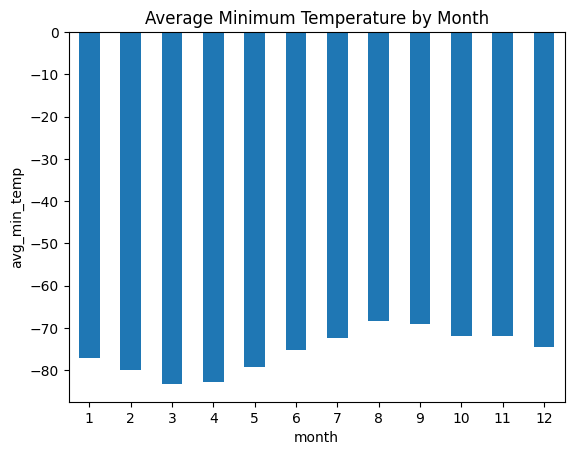

In [60]:
# Plot the average minimum temperature by month
avg_min_temp.plot.bar(rot = 0)
plt.ylabel("avg_min_temp")
plt.title('Average Minimum Temperature by Month')
plt.show()

In [61]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
hottest_month = avg_min_temp.idxmax()
hottest_month_temp = avg_min_temp.max()
coldest_month = avg_min_temp.idxmin()
coldest_month_temp = avg_min_temp.min()
print(f"The month of #{hottest_month} had the hottest average temperature of {hottest_month_temp}")
print(f"the month of #{coldest_month} had the coldest average temperature of {coldest_month_temp}")

The month of #8 had the hottest average temperature of -68.38297872340425
the month of #3 had the coldest average temperature of -83.30729166666667


In [62]:
# 4. What is the average pressure by month?
average_pressure = mars_df['pressure'].groupby(mars_df['month']).mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

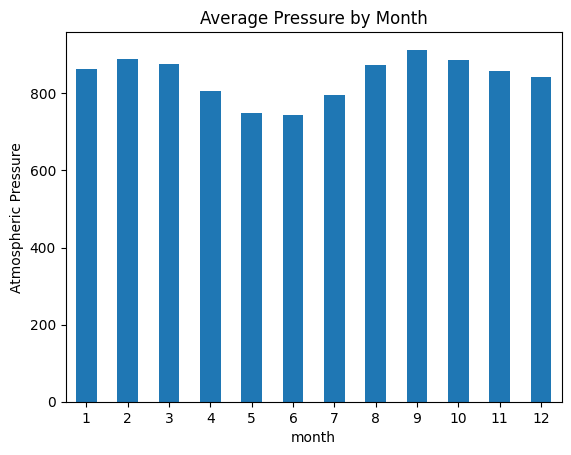

In [63]:
# Plot the average pressure by month
average_pressure.plot.bar(rot = 0)
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

The month of #9 had the lowest pressure of 913.3059701492538
The month of #6 had the highest pressure of 745.0544217687075


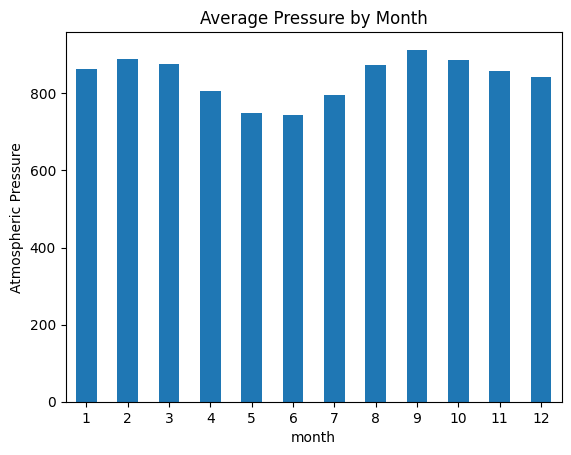

In [64]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure = average_pressure.idxmax()
lowest_pressure_months = average_pressure.max()
highest_pressure = average_pressure.idxmin()
highest_pressure_months = average_pressure.min()
print(f"The month of #{lowest_pressure} had the lowest pressure of {lowest_pressure_months}")
print(f"The month of #{highest_pressure} had the highest pressure of {highest_pressure_months}")


average_pressure.plot.bar(rot = 0)
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

The length of a Martian year is about: 683


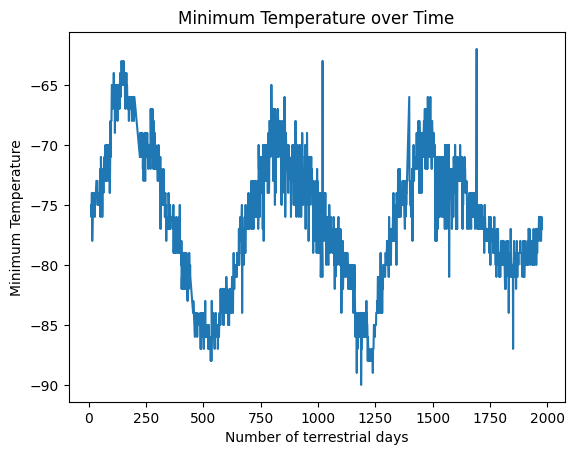

In [65]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_days= mars_df['terrestrial_date'].diff().dt.days.sum() / mars_df['sol'].max()
mars_year = mars_days * 668 
print(f"The length of a Martian year is about: {mars_year:.0f}") 

plt.plot(mars_df['sol'], mars_df['min_temp'])
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature over Time')
plt.show()

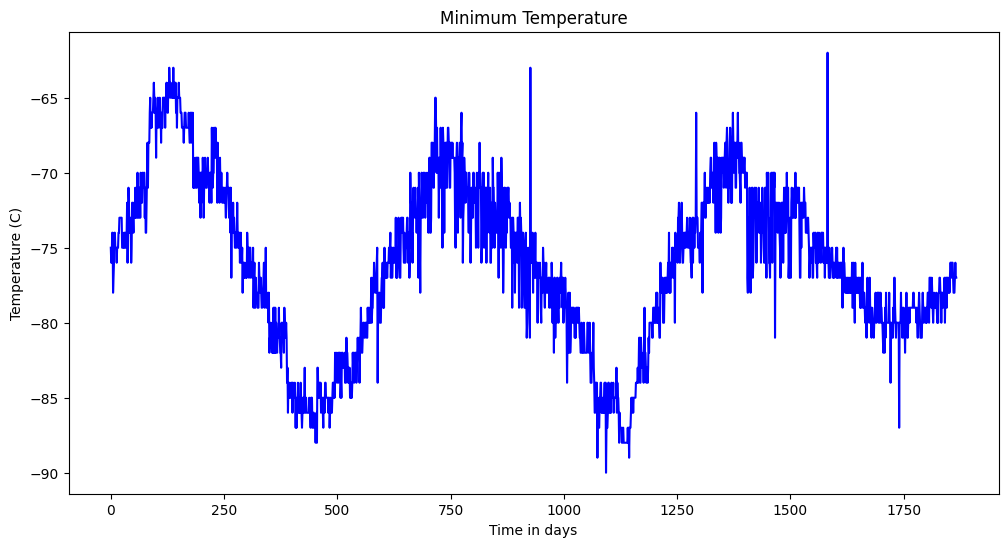

Average minimum temperature is: -76.12 C


In [66]:
#### Minimum Temperature
min_temp = mars_df['min_temp'].astype(float)
plt.figure(figsize=(12,6))
plt.plot(min_temp, color='blue')
plt.title('Minimum Temperature')
plt.xlabel('Time in days')
plt.ylabel('Temperature (C)')
plt.show()
print(f"Average minimum temperature is: {min_temp.mean():.2f} C")

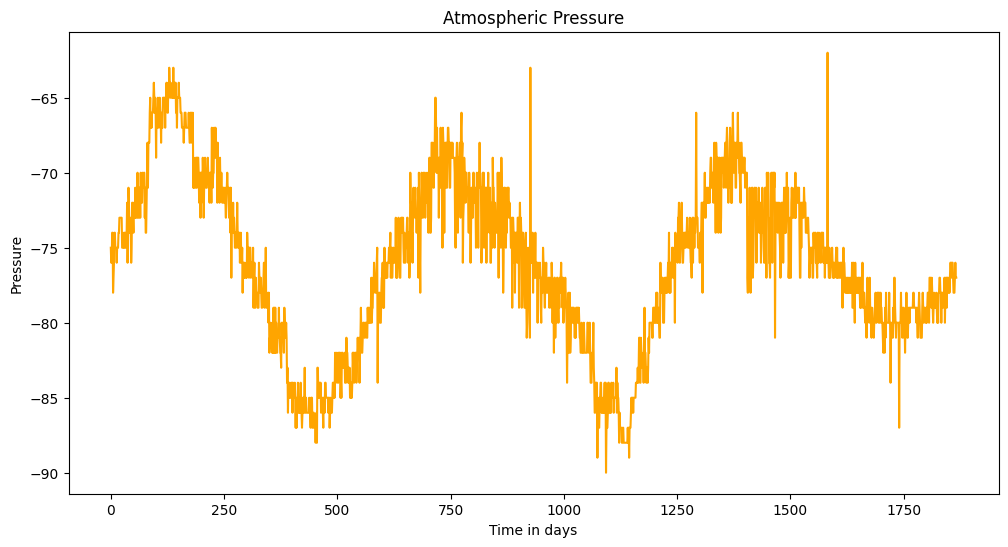

The average atmospheric pressure is: 841.07


In [68]:
#### Atmospheric Pressure
Atmospheric_Pressure = mars_df['pressure'].astype(float)
plt.figure(figsize=(12,6))
plt.plot(min_temp, color='orange')
plt.title('Atmospheric Pressure')
plt.xlabel('Time in days')
plt.ylabel('Pressure')
plt.show()
print(f"The average atmospheric pressure is: {Atmospheric_Pressure.mean():.2f}")

In [69]:
#### Year Length
mars_df['sol'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['year'] = mars_df['sol'].dt.year
year_length=mars_df['year'].nunique()
print(f"The number of years is : {year_length}")

The number of years is : 7


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [70]:
# Write the data to a CSV
output_path = "mars_data.csv"

In [71]:
browser.quit()